In [17]:
#filename = 'agent_log_506'
filename = 'random_1'

#path = "../blossom/outputs/"
path = "../blossom/hpc/outputs/"

In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
from matplotlib.animation import FuncAnimation
from functools import partial


hms = True
vid = False
pdfs = False

x_max = 400
y_max = 400
z_max = 1

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

def rand_jitter(arr):
    if(len(arr)):
        stdev = .001 * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev
    return arr


df = pd.read_csv(path + filename + ".csv")
n = len(df["type"].unique())
colors = colormaps['tab10'].colors

counts_per_type = df.value_counts(['type', 'tick'])

In [19]:
df_first = df[df["tick"] == 0]
df_last = df[df["tick"] == df["tick"].max()]
print('\t\t tick = 0', '\t tick =', df["tick"].max())
print(
    "Total:\t\t",
    len(df_first),
    '\t\t',
    len(df_last),
    '\n'
)
print('Bacteria:\t', len(df_first[df_first["type"] == 0]), '\t\t', len(df_last[df_last["type"] == 0]))
print('Fungi:\t\t', len(df_first[df_first["type"] == 1]), '\t\t', len(df_last[df_last["type"] == 1]))
print('R.F. Nems:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
print('B. Nems:\t', len(df_first[df_first["type"] == 3]), '\t\t', len(df_last[df_last["type"] == 3]))
print('F. Nems:\t', len(df_first[df_first["type"] == 4]), '\t\t', len(df_last[df_last["type"] == 4]))
print('O. Nems:\t', len(df_first[df_first["type"] == 5]), '\t\t', len(df_last[df_last["type"] == 5]))
print('F. Mites:\t', len(df_first[df_first["type"] == 6]), '\t\t', len(df_last[df_last["type"] == 6]))
print('O. Mites:\t', len(df_first[df_first["type"] == 7]), '\t\t', len(df_last[df_last["type"] == 7]))
print('Collembolans:\t', len(df_first[df_first["type"] == 8]), '\t\t', len(df_last[df_last["type"] == 8]))

		 tick = 0 	 tick = 600
Total:		 80000 		 104036 

Bacteria:	 40000 		 30994
Fungi:		 15000 		 0
R.F. Nems:	 5500 		 65557
B. Nems:	 7500 		 1467
F. Nems:	 5500 		 0
O. Nems:	 4000 		 5506
F. Mites:	 1000 		 5
O. Mites:	 500 		 507
Collembolans:	 1000 		 0


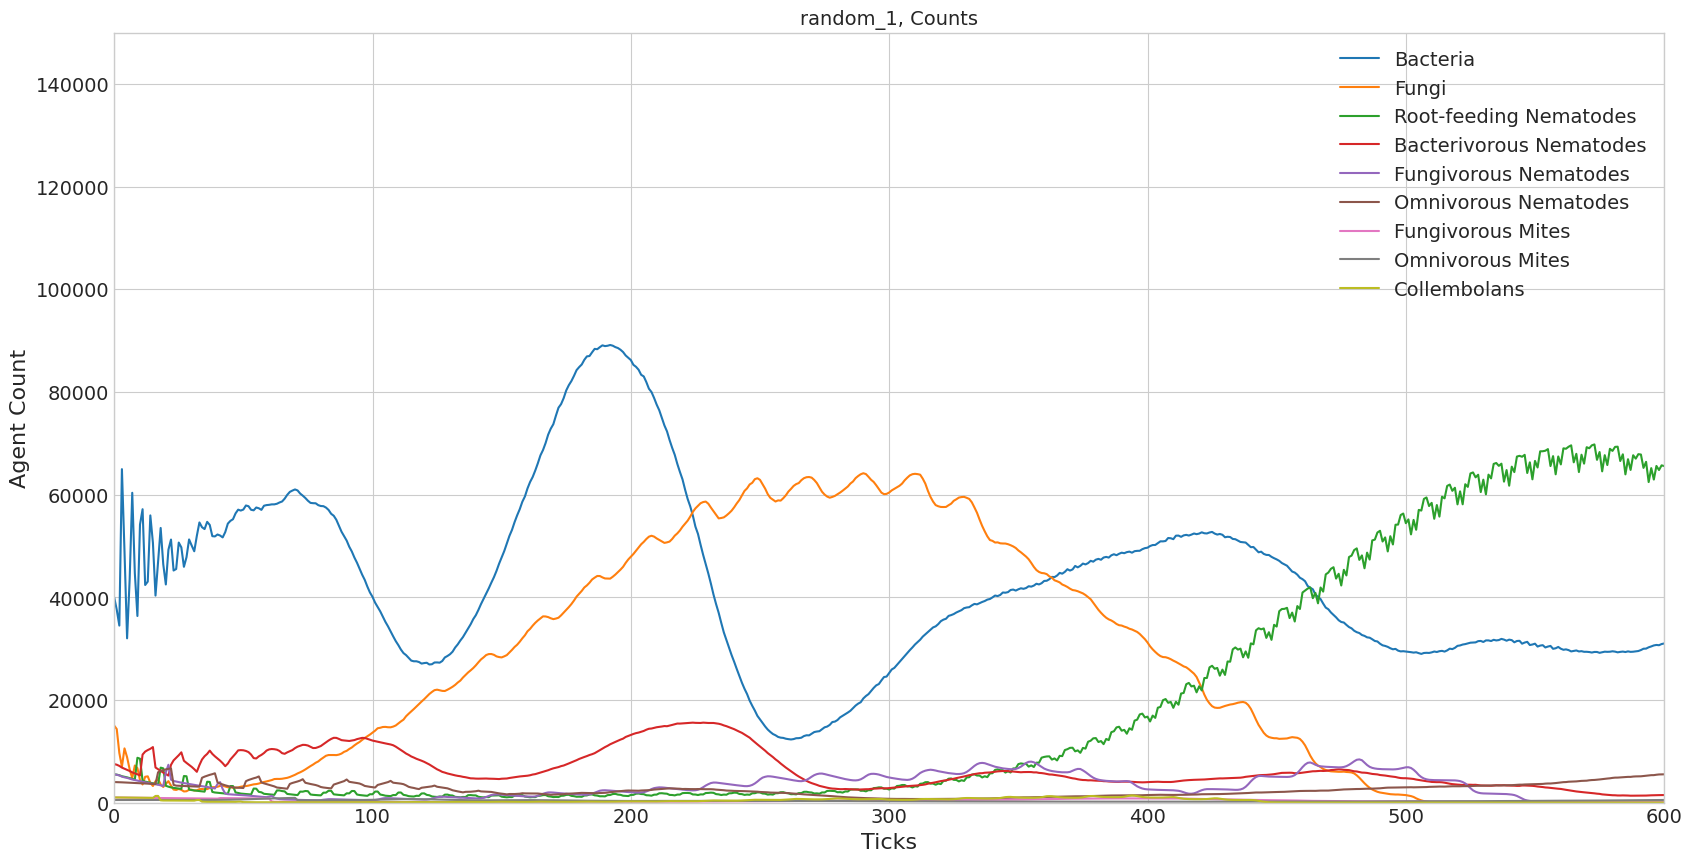

In [20]:
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

for i in df['type'].unique():
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list(),
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, df["tick"].max())
ax.set_ylim(0, 150000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")
ax.set_title(f'{filename}, Counts')

plt.legend()
if pdfs:
    plt.savefig("./agent_counts_viz/" + filename + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

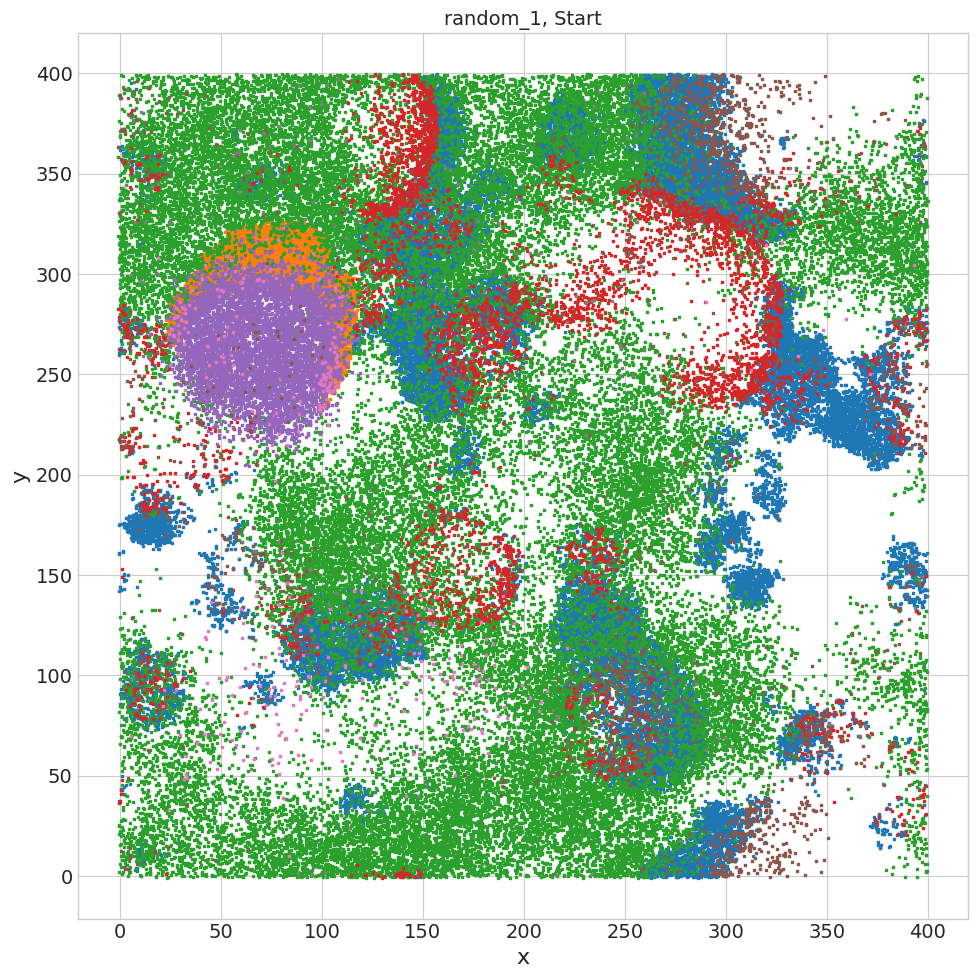

In [21]:
if hms:   
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    df1 = df[df["tick"] == 0]
    
    for t in np.unique(df1["type"]):
        subset_type = df1[df1['type'] == t]
        ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=1, marker='s')
    ax.set_title(f'{filename}, Start')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.tight_layout()
    
    if pdfs:
        plt.savefig("./heatmaps/" + filename + "_hm_start.pdf", format="pdf", bbox_inches="tight")
    plt.show()

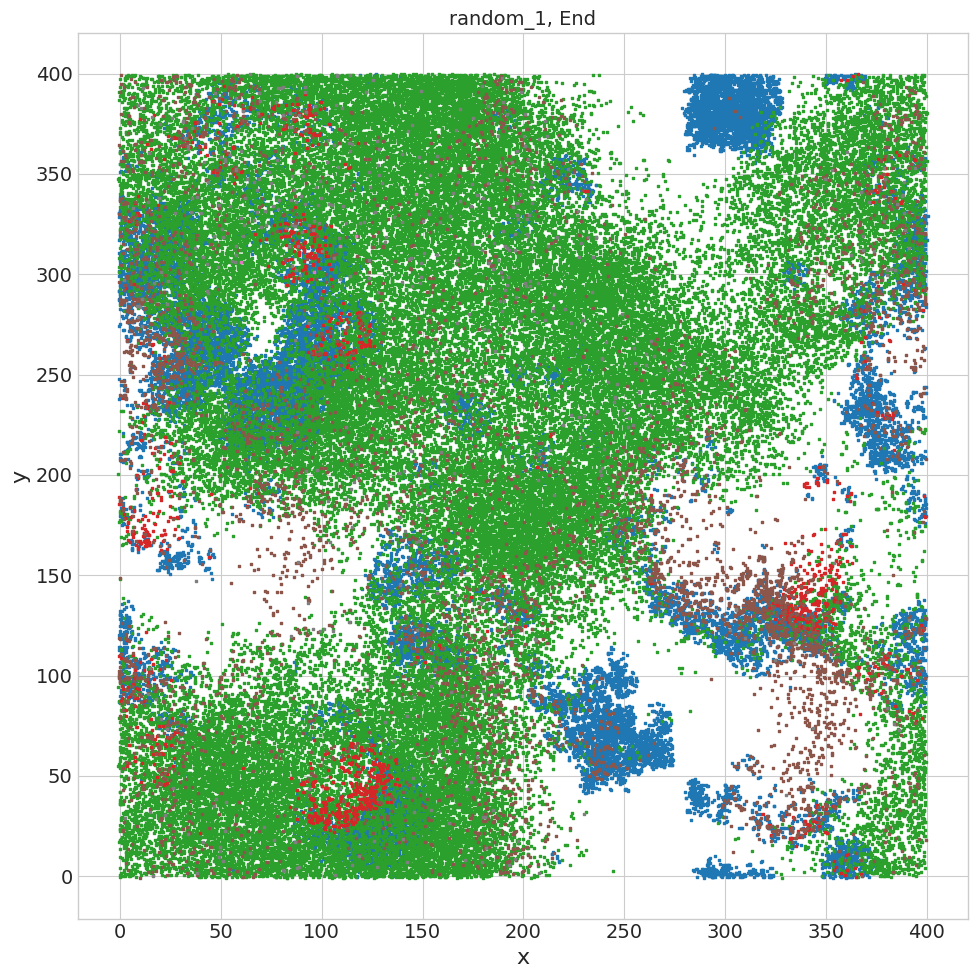

In [22]:
if hms:
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    
    df1 = df[df["tick"] == df["tick"].max()]
    
    for t in np.unique(df1["type"]):
        subset_type = df1[df1['type'] == t]
        ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=1, marker='s')
    ax.set_title(f'{filename}, End')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.tight_layout()
    if pdfs:
        plt.savefig("./heatmaps/" + filename + "_hm_end.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [23]:
def update(t, ax):
    df1 = df[df["tick"] == t]
    ax.cla()
    for t in np.unique(df1["type"]):
        subset_type = df1[df1['type'] == t]
        if(len(subset_type['x']) != 0):
            ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=10, marker='s')
    ax.set_title(f'{filename}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
    ax.grid(False)

if vid:
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()

    ani = FuncAnimation(fig, partial(update, ax=ax), frames=df["tick"].max(), interval=100)

    ani.save("vids/" + filename + ".mp4")

    plt.show()